In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'a': [1, 2, 3, 4, np.nan],
                   'b': [6, 7, 8, np.nan, np.nan],
                   'x': [11, 12, 13, np.nan, np.nan],
                   'y': [16,np.nan,np.nan,19,np.nan]})
df

,a,b,x,y
0,1.0,6.0,11.0,16.0
1,2.0,7.0,12.0,NaN
2,3.0,8.0,13.0,NaN
3,4.0,NaN,NaN,19.0
4,NaN,NaN,NaN,NaN


### Bài 1

In [3]:
# 1
df.replace(np.nan, 0)
# or
df.fillna(0)

,a,b,x,y
0,1.0,6.0,11.0,16.0
1,2.0,7.0,12.0,0.0
2,3.0,8.0,13.0,0.0
3,4.0,0.0,0.0,19.0
4,0.0,0.0,0.0,0.0


In [4]:
# 2
median = df.fillna(df.median(), inplace=False)
median

,a,b,x,y
0,1.0,6.0,11.0,16.0
1,2.0,7.0,12.0,17.5
2,3.0,8.0,13.0,17.5
3,4.0,7.0,12.0,19.0
4,2.5,7.0,12.0,17.5


In [37]:
# 3 
mode = df.fillna(df.mode().iloc[0], inplace=False)
mode

,a,b,x,y
0,1.0,6.0,11.0,16.0
1,2.0,7.0,12.0,16.0
2,3.0,8.0,13.0,16.0
3,4.0,6.0,11.0,19.0
4,1.0,6.0,11.0,16.0


In [ ]:
# 4
dropped = df.dropna()
dropped

,a,b,x,y
0,1.0,6.0,11.0,16.0


In [40]:
# 5 with method ffill and bfill
df.fillna(method='ffill')
df.fillna(method='bfill')

C:\Users\khanh\AppData\Local\Temp\ipykernel_18968\3799493383.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')
C:\Users\khanh\AppData\Local\Temp\ipykernel_18968\3799493383.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,a,b,x,y
0,1.0,6.0,11.0,16.0
1,2.0,7.0,12.0,19.0
2,3.0,8.0,13.0,19.0
3,4.0,NaN,NaN,19.0
4,NaN,NaN,NaN,NaN


In [ ]:
# 6
df.describe()
# std: độ lệch chuẩn
# 25: phân vị Q1
# 50: Phân vị Q2 hoặc trung vị
# 75: Phân vị Q3

,a,b,x,y
count,4.000000,3.0,3.0,2.00000
mean,2.500000,7.0,12.0,17.50000
std,1.290994,1.0,1.0,2.12132
min,1.000000,6.0,11.0,16.00000
25%,1.750000,6.5,11.5,16.75000
50%,2.500000,7.0,12.0,17.50000
75%,3.250000,7.5,12.5,18.25000
max,4.000000,8.0,13.0,19.00000


#### 7: Missing values

###### I. Biểu diễn

1. Biểu diễn missing values
Pandas sử dụng 2 giá trị chính để biểu diễn missing values:

- NaN (Not a Number): Được sử dụng cho các kiểu dữ liệu số (float hoặc int).
- None: Được sử dụng cho các kiểu dữ liệu đối tượng (object).

2. Phát hiện missing values
Pandas cung cấp các phương thức để phát hiện missing values:

- isna(): Trả về True nếu giá trị là missing.
- notna(): Trả về True nếu giá trị không phải là missing.

### Bài 2: xử lý giá trị ngoại lai

##### 1. Phương pháp IQR

In [21]:
data = np.array([12, 13, 12, 10, 10, 11, 12, 15, 12, 16])
df = pd.Series(data)
df

0    12
1    13
2    12
3    10
4    10
5    11
6    12
7    15
8    12
9    16
dtype: int64

In [23]:
# giá trị q1, q2, q3
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)
Q1, Q2, Q3

(np.float64(11.25), np.float64(12.0), np.float64(12.75))

In [24]:
# 2 Tính IQR
iqr = Q3 - Q1 
iqr

np.float64(1.5)

In [39]:
# 3 Liệt kê phần tử ngoại lai
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 - 1.5 * iqr

outlier_dt = (df < lower_bound) | (df > upper_bound)
df[outlier_dt]


0    12
1    13
2    12
5    11
6    12
7    15
8    12
9    16
dtype: int64

In [42]:
# 4. Loại bỏ phần tử ngoại lai
df_no_outlier = df[~outlier_dt]
df_no_outlier

3    10
4    10
dtype: int64

##### 2. Phương pháp Zscore

In [36]:
# 1
import numpy as np
# 2
import pandas as pd
# 3
dataset = [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 12, 100]
# 4
outliers = []

# 5
def detect_outlier(data_1):
    # 5.1
    threshold = 3
    # 5.2
    mean_1 = np.mean(data_1)
    # 5.3
    std_1 = np.std(data_1)
    # 5.4
    for y in data_1:
        # 5.4.1
        z_score = (y - mean_1) / std_1
        # 5.4.2
        if np.abs(z_score) > threshold:
            # 5.4.3
            outliers.append(y)
    # 5.5
    return outliers

# 6
outlier_datapoints = detect_outlier(dataset)
# 7
print('data set: ', dataset)
# 8
print('outlier_datapoints of data set: ', outlier_datapoints)

data set:  [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 12, 100]
outlier_datapoints of data set:  [100]


1. Giải thích từng lệnh

| Mã | Dòng lệnh | Giải thích |
|------|-----------|-------------|
|1| `import numpy as np` | Nhập thư viện NumPy, được sử dụng cho các phép toán số học trong Python. |
|2| `import pandas as pd` | Nhập thư viện Pandas, được sử dụng để thao tác và phân tích dữ liệu trong Python. |
|3| `dataset = [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 12, 100]` | Tạo một danh sách dữ liệu mẫu `dataset`. |
|4| `outliers = []` | Tạo một danh sách rỗng `outliers` để lưu trữ các giá trị ngoại lệ. |
|5| `def detect_outlier(data_1):` | Định nghĩa một hàm `detect_outlier` để phát hiện các giá trị ngoại lệ trong danh sách `data_1`. |
|5.1| `threshold = 3` | Đặt ngưỡng `threshold` là 3, giá trị này sẽ được sử dụng để xác định các giá trị ngoại lệ. |
|5.2| `mean_1 = np.mean(data_1)` | Tính giá trị trung bình `mean_1` của danh sách `data_1` bằng cách sử dụng hàm `mean` của NumPy. |
|5.3| `std_1 = np.std(data_1)` | Tính độ lệch chuẩn `std_1` của danh sách `data_1` bằng cách sử dụng hàm `std` của NumPy. |
|5.4| `for y in data_1:` | Bắt đầu một vòng lặp để duyệt qua từng phần tử `y` trong danh sách `data_1`. |
|5.4.1| `z_score = (y - mean_1) / std_1` | Tính điểm z `z_score` của phần tử `y`, dựa trên giá trị trung bình `mean_1` và độ lệch chuẩn `std_1`. |
|5.4.2| `if np.abs(z_score) > threshold:` | Kiểm tra nếu giá trị tuyệt đối của `z_score` lớn hơn ngưỡng `threshold`. |
|5.4.3| `outliers.append(y)` | Nếu điều kiện trên đúng, thêm phần tử `y` vào danh sách `outliers`. |
|5.5| `return outliers` | Trả về danh sách các giá trị ngoại lệ `outliers`. |
|6| `outlier_datapoints = detect_outlier(dataset)` | Gọi hàm `detect_outlier` với danh sách `dataset` và lưu trữ kết quả vào biến `outlier_datapoints`. |
|7| `print('data set: ', dataset)` | In ra danh sách dữ liệu mẫu `dataset`. |
|8| `print('outlier_datapoints of data set: ', outlier_datapoints)` | In ra các giá trị ngoại lệ `outlier_datapoints` của danh sách dữ liệu mẫu `dataset`. |

In [ ]:
# 2. Đưa ra tập dữ liệu sau khi xóa phần tử ngoại lai
dataset_no_outliers = [x for x in dataset if x not in outlier_datapoints]
dataset_no_outliers

[10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 12]

3. Báo áo về phương pháp Zscore

3.1 Giới Thiệu
Giá trị ngoại lai là những điểm dữ liệu khác biệt đáng kể so với các quan sát khác trong tập dữ liệu. Chúng có thể xuất hiện do lỗi nhập liệu, sự khác biệt trong điều kiện thí nghiệm, hoặc các yếu tố bất thường khác. Việc phát hiện và xử lý giá trị ngoại lai là một bước quan trọng trong quá trình phân tích dữ liệu để đảm bảo tính chính xác và độ tin cậy của kết quả.

3.2. Phương Pháp Z-score
Phương pháp Z-score là một kỹ thuật phổ biến để phát hiện giá trị ngoại lai. Z-score đo lường khoảng cách của một điểm dữ liệu so với giá trị trung bình của tập dữ liệu, tính theo đơn vị độ lệch chuẩn. Công thức tính Z-score cho một điểm dữ liệu \( x \) là:

Z = (y<sub>i</sub> - mean(y)) / std(y)

Trong đó:
- mean(y) là giá trị trung bình của tập dữ liệu.
- std(y) là độ lệch chuẩn của tập dữ liệu.

Nếu giá trị tuyệt đối của Z-score lớn hơn một ngưỡng nhất định (thường là 3), điểm dữ liệu đó được coi là giá trị ngoại lai.

3.3 Kết Luận
Phương pháp Z-score là một công cụ mạnh mẽ và dễ sử dụng để phát hiện giá trị ngoại lai trong tập dữ liệu. Bằng cách loại bỏ hoặc xử lý các giá trị ngoại lai, chúng ta có thể cải thiện chất lượng và độ tin cậy của phân tích dữ liệu. Tuy nhiên, cần lưu ý rằng việc lựa chọn ngưỡng Z-score phù hợp là rất quan trọng và có thể cần điều chỉnh tùy thuộc vào đặc điểm cụ thể của tập dữ liệu.

##### 3. Phương pháp dựa vào trung vị

,Object,Income,Age,Class
0,1,3000000,23,Y
1,2,9600000,56,N
2,3,4700000,43,Y
3,4,7000000,30,N
4,5,6200000,65,N
5,6,2200000,26,Y
6,7,6600000,38,N
7,8,2000000,31,Y
8,9,6300000,37,Y
9,10,7000000,42,N


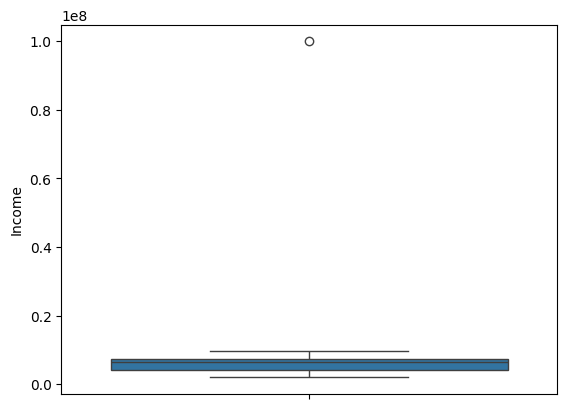

In [2]:
df = pd.read_csv('data/lab2/bai3_median.csv')
sns.boxplot(df['Income'])
df

In [23]:
def outlier_median(data):
    if not len(data): return []
    thresh = 4.5
    outliers = []
    median_x = np.median(data)
    dis = [np.abs(x - median_x) for x in data]
        
    md = np.median(dis)
    for i, di in enumerate(dis): 
        ti = di / md
        if ti > thresh:
            outliers.append(data[i])
    
    return outliers 

In [24]:
outlier_median(df['Income'])
# df['Income']

[np.int64(100000000)]

### Bài 3: Giảm chiều dữ liệu

In [26]:
df = pd.read_csv('data/lab2/bai3_median.csv')
df

,Object,Income,Age,Class
0,1,3000000,23,Y
1,2,9600000,56,N
2,3,4700000,43,Y
3,4,7000000,30,N
4,5,6200000,65,N
5,6,2200000,26,Y
6,7,6600000,38,N
7,8,2000000,31,Y
8,9,6300000,37,Y
9,10,7000000,42,N


In [43]:
outliers = detect_outlier(df['Income'])
df['Income'] = [x if x not in outliers else df['Income'].median()
                for x in df['Income']]
df

,Object,Income,Age,Class
0,1,3000000.0,23,Y
1,2,9600000.0,56,N
2,3,4700000.0,43,Y
3,4,7000000.0,30,N
4,5,6200000.0,65,N
5,6,2200000.0,26,Y
6,7,6600000.0,38,N
7,8,2000000.0,31,Y
8,9,6300000.0,37,Y
9,10,7000000.0,42,N


In [42]:
corr = df['Income'].corr(df['Age'], method='kendall') 
corr

np.float64(0.3511552695176641)

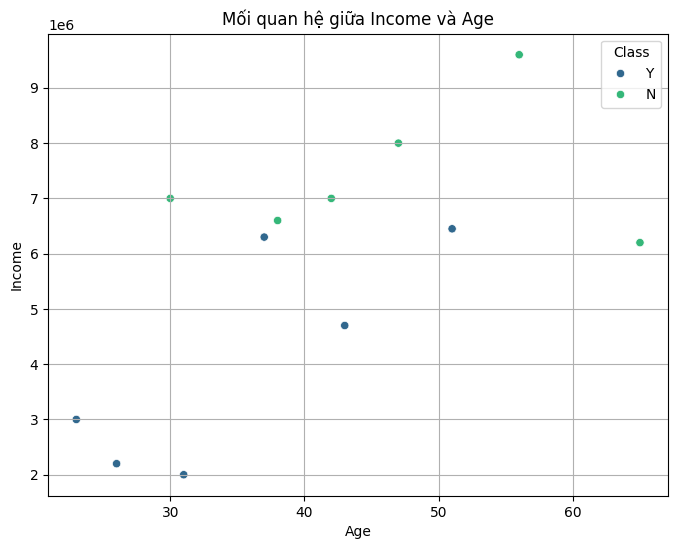

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Income'],
                hue=df['Class'], palette='viridis')
plt.title("Mối quan hệ giữa Income và Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(True)
plt.show()

### 4. Rời rạc hóa dữ liệu

In [ ]:
# Câu 4.1
# 1
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
# 2
bins = [18, 25, 35, 60, 100]
# 3
cats = pd.cut(ages, bins)
# 4
print(cats)
# 5
print('codes', cats.codes)
# 6
print('categories', cats.categories)
# 7
print('counts \n', cats.value_counts())

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
codes [0 0 0 1 0 0 2 1 3 2 2 1]
categories IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')
counts 
 (18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64


4.  1.2. Giải Thích Mã Nguồn

| Mã | Code | Giải Thích |
|----|------|------------|
| 1  | `ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]` | Khởi tạo danh sách `ages` chứa các độ tuổi khác nhau. |
| 2  | `bins = [18, 25, 35, 60, 100]` | Khởi tạo danh sách `bins` chứa các khoảng giá trị để phân loại độ tuổi. |
| 3  | `cats = pd.cut(ages, bins)` | Sử dụng hàm `pd.cut` của pandas để phân loại các độ tuổi trong `ages` vào các khoảng giá trị trong `bins`. |
| 4  | `print(cats)` | In ra kết quả phân loại các độ tuổi. |
| 5  | `print('codes', cats.codes)` | In ra mã số của các khoảng giá trị mà mỗi độ tuổi thuộc về. |
| 6  | `print('categories', cats.categories)` | In ra các khoảng giá trị (categories) được sử dụng để phân loại độ tuổi. |
| 7  | `print('counts \n', cats.value_counts())` | In ra số lượng độ tuổi trong mỗi khoảng giá trị. |

In [ ]:
# Câu 4.2
cats1 = pd.cut(ages,  [18, 26, 36, 61, 100], right=False)
print(cats1)
print('codes', cats1.codes)
print('categories', cats1.categories)
print('counts \n', cats1.value_counts())

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
codes [0 0 0 1 0 0 2 1 3 2 2 1]
categories IntervalIndex([[18, 26), [26, 36), [36, 61), [61, 100)], dtype='interval[int64, left]')
counts 
 [18, 26)     5
[26, 36)     3
[36, 61)     3
[61, 100)    1
Name: count, dtype: int64


4. 2.2 Giải thích kết quả

- Khoảng đã được đóng bên trái thay vì bên phải (mặc định) 

In [12]:
# Câu 4.3
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
cats2 = pd.cut(ages, bins, labels=group_names) 
print(cats2)
print('codes', cats2.codes)
print('categories', cats2.categories)
print('counts \n', cats2.value_counts())

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']
codes [0 0 0 1 0 0 2 1 3 2 2 1]
categories Index(['Youth', 'YoungAdult', 'MiddleAged', 'Senior'], dtype='object')
counts 
 Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
Name: count, dtype: int64


4. 3.2 Giải thích kết quả

- Các nhóm(khoảng) đã được thay thế bằng tên trong group_names

### Bài 5

In [ ]:
new_dt = np.random.rand(20)

array([0.32654785, 0.9759914 , 0.18183486, 0.05184243, 0.38759016,
       0.75020242, 0.32001715, 0.65113757, 0.90228971, 0.83028749,
       0.21858775, 0.60014818, 0.97270292, 0.18383558, 0.1945078 ,
       0.18998008, 0.9409265 , 0.19628606, 0.86146157, 0.9514933 ])

In [20]:
# a 
cats3 = pd.cut(new_dt, 4, precision=2)
cats3

[(0.28, 0.51], (0.74, 0.98], (0.051, 0.28], (0.051, 0.28], (0.28, 0.51], ..., (0.051, 0.28], (0.74, 0.98], (0.051, 0.28], (0.74, 0.98], (0.74, 0.98]]
Length: 20
Categories (4, interval[float64, right]): [(0.051, 0.28] < (0.28, 0.51] < (0.51, 0.74] < (0.74, 0.98]]

In [17]:
# b 
cats4 = pd.cut(new_dt, 4)
cats4

[(0.283, 0.514], (0.745, 0.976], (0.0509, 0.283], (0.0509, 0.283], (0.283, 0.514], ..., (0.0509, 0.283], (0.745, 0.976], (0.0509, 0.283], (0.745, 0.976], (0.745, 0.976]]
Length: 20
Categories (4, interval[float64, right]): [(0.0509, 0.283] < (0.283, 0.514] < (0.514, 0.745] < (0.745, 0.976]]